In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tickers = ['SPY','TLT']
start = dt.datetime(2008,1,1)
end = dt.datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start,end)

In [3]:
data = data['Adj Close']

In [4]:
def evaluate_split(data,split):
    portfolio = [split,1. - split]

    eval_set =  ((data/data.iloc[0])*portfolio).sum(axis=1)

    cagr = (eval_set.iloc[-1]/eval_set.iloc[0])**(1/10)-1

    rolling_max = eval_set.cummax()
    daily_drawdown = eval_set/rolling_max - 1
    drawdown = daily_drawdown.cummin().iloc[-1]

    log_returns = (np.log(eval_set/eval_set.shift()))
    volatility = log_returns.std()*(252**.5)

    return cagr,drawdown,volatility

In [5]:
evaluate_split(data,.5)

(0.0750507458777323, -0.17891784140772238, 0.08841902237381151)

In [6]:
x = np.arange(0,1,.05) 

df = pd.DataFrame(x)

res = df.apply(lambda x: evaluate_split(data,x), axis=1)

df['CAGR'] = res.str[0]
df['Drawdown'] = res.str[1]
df['Volatility'] = res.str[2]

df.set_index(0,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [7]:
df

,CAGR,Drawdown,Volatility
0,,,
0.00,NaN,NaN,NaN
0.05,NaN,NaN,NaN
0.10,NaN,NaN,NaN
0.15,NaN,NaN,NaN
0.20,NaN,NaN,NaN
0.25,NaN,NaN,NaN
0.30,NaN,NaN,NaN
0.35,NaN,NaN,NaN
0.40,NaN,NaN,NaN


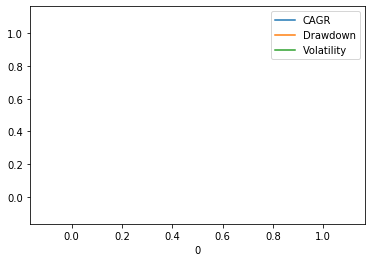

In [8]:
fig,ax = plt.subplots()
df.plot(ax=ax)

In [9]:
df.iloc[df['CAGR'].argmax()]

CAGR         NaN
Drawdown     NaN
Volatility   NaN
Name: 0.9500000000000001, dtype: float64